## This notebook scrapes the CIA World Factbook website and downloads the text data for any country of your choosing (or all of them)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl

### Ignore SSL certificate errors, send HHTP request, and read the HTML

In [2]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

# Read the HTML from the URL and pass on to BeautifulSoup
url = 'https://www.cia.gov/library/publications/the-world-factbook/'
print("Opening the file connection...")
uh= urllib.request.urlopen(url, context=ctx)
print("HTTP status",uh.getcode())
html =uh.read().decode()
print(f"Reading done. Total {len(html)} characters read.")

Opening the file connection...
HTTP status 200
Reading done. Total 75036 characters read.


### Parse the front-page HTML using BeautifulSoup and print it

In [3]:
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <link href="css/publications.css" rel="stylesheet" type="text/css"/>
  <link href="css/publications-detail.css" rel="stylesheet" type="text/css"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title>
   The World Factbook — Central Intelligence Agency
  </title>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="Apr 01, 2016" name="LastModified"/>
  <link href="css/jobcart.css" rel="stylesheet"/>
  <link href="css/smallscreen.css" rel="st

### Extract the country names and codes from the parsed HTML doc

In [4]:
country_codes=[]
country_names=[]
for tag in soup.find_all('option'):
    country_codes.append(tag.get('value')[5:7])
    country_names.append(tag.text)

temp=country_codes.pop(0) # To remove the first entry 'World'
temp=country_names.pop(0) # To remove the first entry 'World'

In [5]:
print('COUNTRY NAMES\n'+'-'*30)
for country in country_names[1:]:
    print(country,end=',')
print('\n\nCOUNTRY CODES\n'+'-'*30)
for country in country_codes[1:]:
    print(country,end=',')

COUNTRY NAMES
------------------------------
 Afghanistan , Akrotiri , Albania , Algeria , American Samoa , Andorra , Angola , Anguilla , Antarctica , Antigua and Barbuda , Arctic Ocean , Argentina , Armenia , Aruba , Ashmore and Cartier Islands , Atlantic Ocean , Australia , Austria , Azerbaijan , Bahamas, The , Bahrain , Baker Island , Bangladesh , Barbados , Belarus , Belgium , Belize , Benin , Bermuda , Bhutan , Bolivia , Bosnia and Herzegovina , Botswana , Bouvet Island , Brazil , British Indian Ocean Territory , British Virgin Islands , Brunei , Bulgaria , Burkina Faso , Burma , Burundi , Cabo Verde , Cambodia , Cameroon , Canada , Cayman Islands , Central African Republic , Chad , Chile , China , Christmas Island , Clipperton Island , Cocos (Keeling) Islands , Colombia , Comoros , Congo, Democratic Republic of the , Congo, Republic of the , Cook Islands , Coral Sea Islands , Costa Rica , Cote d'Ivoire , Croatia , Cuba , Curacao , Cyprus , Czechia , Denmark , Dhekelia , Djibouti 

### Extract the demographics

In [6]:
# Base URL
urlbase = 'https://www.cia.gov/library/publications/the-world-factbook/geos/'
demographics1=[]
demographics2=[]
demographics3=[]
demographics4=[]
demographics5=[]

offset = len('65 years and over: ')

# Iterate over every country
for i in range(1,len(country_names)-1):
    country_html=country_codes[i]+'.html'
    url_to_get=urlbase+country_html
    # Read the HTML from the URL and pass on to BeautifulSoup
    html = urllib.request.urlopen(url_to_get, context=ctx).read()
    soup = BeautifulSoup(html, 'html.parser')
    
    txt=soup.get_text()
    pos1=txt.find('0-14 years: ')
    pos2=txt.find('15-24 years: ')
    pos3=txt.find('25-54 years: ')
    pos4=txt.find('55-64 years: ')
    pos5=txt.find('65 years and over: ')
    
    if pos1==-1:
        print(f"**0-14 years % data not found for {country_names[i]}!**")
        demographics1.append(np.nan)
    else:
        text=txt[pos1+12:pos1+18]
        end=re.search('%',text).start()
        a=float((txt[pos1+12:pos1+12+end]))
        demographics1.append(a)
        print(f"0-14 years % data extraction complete for {country_names[i]}!")
    
    if pos2==-1:
        print(f"**15-24 years % data not found for {country_names[i]}!**")
        demographics2.append(np.nan)
    else:
        text=txt[pos2+13:pos2+19]
        end=re.search('%',text).start()
        a=float((txt[pos2+13:pos2+13+end]))
        demographics2.append(a)
        print(f"15-24 years % data extraction complete for {country_names[i]}!")
        
    if pos3==-1:
        print(f"**25-54 years % data not found for {country_names[i]}!**")
        demographics3.append(np.nan)
    else:
        text=txt[pos3+13:pos3+19]
        end=re.search('%',text).start()
        a=float((txt[pos3+13:pos3+13+end]))
        demographics3.append(a)
        print(f"25-54 years % data extraction complete for {country_names[i]}!")
    
    if pos4==-1:
        print(f"**55-64 years % data not found for {country_names[i]}!**")
        demographics4.append(np.nan)
    else:
        text=txt[pos4+13:pos4+19]
        end=re.search('%',text).start()
        a=float((txt[pos4+13:pos4+13+end]))
        demographics4.append(a)
        print(f"55-64 years % data extraction complete for {country_names[i]}!")
    
    
    if pos5==-1:
        print(f"**65 years and beyond % data not found for {country_names[i]}!**")
        demographics5.append(np.nan)
    else:
        text=txt[pos5+offset:pos5+offset+6]
        end=re.search('%',text).start()
        a=float((txt[pos5+offset:pos5+offset+end]))
        demographics5.append(a)
        print(f"65 years and beyond % data extraction complete for {country_names[i]}!")

0-14 years % data extraction complete for  Afghanistan !
15-24 years % data extraction complete for  Afghanistan !
25-54 years % data extraction complete for  Afghanistan !
55-64 years % data extraction complete for  Afghanistan !
65 years and beyond % data extraction complete for  Afghanistan !
**0-14 years % data not found for  Akrotiri !**
**15-24 years % data not found for  Akrotiri !**
**25-54 years % data not found for  Akrotiri !**
**55-64 years % data not found for  Akrotiri !**
**65 years and beyond % data not found for  Akrotiri !**
0-14 years % data extraction complete for  Albania !
15-24 years % data extraction complete for  Albania !
25-54 years % data extraction complete for  Albania !
55-64 years % data extraction complete for  Albania !
65 years and beyond % data extraction complete for  Albania !
0-14 years % data extraction complete for  Algeria !
15-24 years % data extraction complete for  Algeria !
25-54 years % data extraction complete for  Algeria !
55-64 years %

0-14 years % data extraction complete for  Bhutan !
15-24 years % data extraction complete for  Bhutan !
25-54 years % data extraction complete for  Bhutan !
55-64 years % data extraction complete for  Bhutan !
65 years and beyond % data extraction complete for  Bhutan !
0-14 years % data extraction complete for  Bolivia !
15-24 years % data extraction complete for  Bolivia !
25-54 years % data extraction complete for  Bolivia !
55-64 years % data extraction complete for  Bolivia !
65 years and beyond % data extraction complete for  Bolivia !
0-14 years % data extraction complete for  Bosnia and Herzegovina !
15-24 years % data extraction complete for  Bosnia and Herzegovina !
25-54 years % data extraction complete for  Bosnia and Herzegovina !
55-64 years % data extraction complete for  Bosnia and Herzegovina !
65 years and beyond % data extraction complete for  Bosnia and Herzegovina !
0-14 years % data extraction complete for  Botswana !
15-24 years % data extraction complete for  B

0-14 years % data extraction complete for  Congo, Republic of the !
15-24 years % data extraction complete for  Congo, Republic of the !
25-54 years % data extraction complete for  Congo, Republic of the !
55-64 years % data extraction complete for  Congo, Republic of the !
65 years and beyond % data extraction complete for  Congo, Republic of the !
0-14 years % data extraction complete for  Cook Islands !
15-24 years % data extraction complete for  Cook Islands !
25-54 years % data extraction complete for  Cook Islands !
55-64 years % data extraction complete for  Cook Islands !
65 years and beyond % data extraction complete for  Cook Islands !
**0-14 years % data not found for  Coral Sea Islands !**
**15-24 years % data not found for  Coral Sea Islands !**
**25-54 years % data not found for  Coral Sea Islands !**
**55-64 years % data not found for  Coral Sea Islands !**
**65 years and beyond % data not found for  Coral Sea Islands !**
0-14 years % data extraction complete for  Costa 

0-14 years % data extraction complete for  Gabon !
15-24 years % data extraction complete for  Gabon !
25-54 years % data extraction complete for  Gabon !
55-64 years % data extraction complete for  Gabon !
65 years and beyond % data extraction complete for  Gabon !
0-14 years % data extraction complete for  Gambia, The !
15-24 years % data extraction complete for  Gambia, The !
25-54 years % data extraction complete for  Gambia, The !
55-64 years % data extraction complete for  Gambia, The !
65 years and beyond % data extraction complete for  Gambia, The !
0-14 years % data extraction complete for  Gaza Strip !
15-24 years % data extraction complete for  Gaza Strip !
25-54 years % data extraction complete for  Gaza Strip !
55-64 years % data extraction complete for  Gaza Strip !
65 years and beyond % data extraction complete for  Gaza Strip !
0-14 years % data extraction complete for  Georgia !
15-24 years % data extraction complete for  Georgia !
25-54 years % data extraction complet

0-14 years % data extraction complete for  Ireland !
15-24 years % data extraction complete for  Ireland !
25-54 years % data extraction complete for  Ireland !
55-64 years % data extraction complete for  Ireland !
65 years and beyond % data extraction complete for  Ireland !
0-14 years % data extraction complete for  Isle of Man !
15-24 years % data extraction complete for  Isle of Man !
25-54 years % data extraction complete for  Isle of Man !
55-64 years % data extraction complete for  Isle of Man !
65 years and beyond % data extraction complete for  Isle of Man !
0-14 years % data extraction complete for  Israel !
15-24 years % data extraction complete for  Israel !
25-54 years % data extraction complete for  Israel !
55-64 years % data extraction complete for  Israel !
65 years and beyond % data extraction complete for  Israel !
0-14 years % data extraction complete for  Italy !
15-24 years % data extraction complete for  Italy !
25-54 years % data extraction complete for  Italy !

0-14 years % data extraction complete for  Macedonia !
15-24 years % data extraction complete for  Macedonia !
25-54 years % data extraction complete for  Macedonia !
55-64 years % data extraction complete for  Macedonia !
65 years and beyond % data extraction complete for  Macedonia !
0-14 years % data extraction complete for  Madagascar !
15-24 years % data extraction complete for  Madagascar !
25-54 years % data extraction complete for  Madagascar !
55-64 years % data extraction complete for  Madagascar !
65 years and beyond % data extraction complete for  Madagascar !
0-14 years % data extraction complete for  Malawi !
15-24 years % data extraction complete for  Malawi !
25-54 years % data extraction complete for  Malawi !
55-64 years % data extraction complete for  Malawi !
65 years and beyond % data extraction complete for  Malawi !
0-14 years % data extraction complete for  Malaysia !
15-24 years % data extraction complete for  Malaysia !
25-54 years % data extraction complete f

0-14 years % data extraction complete for  Nigeria !
15-24 years % data extraction complete for  Nigeria !
25-54 years % data extraction complete for  Nigeria !
55-64 years % data extraction complete for  Nigeria !
65 years and beyond % data extraction complete for  Nigeria !
**0-14 years % data not found for  Niue !**
**15-24 years % data not found for  Niue !**
**25-54 years % data not found for  Niue !**
**55-64 years % data not found for  Niue !**
**65 years and beyond % data not found for  Niue !**
**0-14 years % data not found for  Norfolk Island !**
**15-24 years % data not found for  Norfolk Island !**
**25-54 years % data not found for  Norfolk Island !**
**55-64 years % data not found for  Norfolk Island !**
**65 years and beyond % data not found for  Norfolk Island !**
0-14 years % data extraction complete for  Northern Mariana Islands !
15-24 years % data extraction complete for  Northern Mariana Islands !
25-54 years % data extraction complete for  Northern Mariana Islands

0-14 years % data extraction complete for  Saint Pierre and Miquelon !
15-24 years % data extraction complete for  Saint Pierre and Miquelon !
25-54 years % data extraction complete for  Saint Pierre and Miquelon !
55-64 years % data extraction complete for  Saint Pierre and Miquelon !
65 years and beyond % data extraction complete for  Saint Pierre and Miquelon !
0-14 years % data extraction complete for  Saint Vincent and the Grenadines !
15-24 years % data extraction complete for  Saint Vincent and the Grenadines !
25-54 years % data extraction complete for  Saint Vincent and the Grenadines !
55-64 years % data extraction complete for  Saint Vincent and the Grenadines !
65 years and beyond % data extraction complete for  Saint Vincent and the Grenadines !
0-14 years % data extraction complete for  Samoa !
15-24 years % data extraction complete for  Samoa !
25-54 years % data extraction complete for  Samoa !
55-64 years % data extraction complete for  Samoa !
65 years and beyond % da

0-14 years % data extraction complete for  Switzerland !
15-24 years % data extraction complete for  Switzerland !
25-54 years % data extraction complete for  Switzerland !
55-64 years % data extraction complete for  Switzerland !
65 years and beyond % data extraction complete for  Switzerland !
0-14 years % data extraction complete for  Syria !
15-24 years % data extraction complete for  Syria !
25-54 years % data extraction complete for  Syria !
55-64 years % data extraction complete for  Syria !
65 years and beyond % data extraction complete for  Syria !
0-14 years % data extraction complete for  Taiwan !
15-24 years % data extraction complete for  Taiwan !
25-54 years % data extraction complete for  Taiwan !
55-64 years % data extraction complete for  Taiwan !
65 years and beyond % data extraction complete for  Taiwan !
0-14 years % data extraction complete for  Tajikistan !
15-24 years % data extraction complete for  Tajikistan !
25-54 years % data extraction complete for  Tajikis

**0-14 years % data not found for  Wake Island !**
**15-24 years % data not found for  Wake Island !**
**25-54 years % data not found for  Wake Island !**
**55-64 years % data not found for  Wake Island !**
**65 years and beyond % data not found for  Wake Island !**
0-14 years % data extraction complete for  Wallis and Futuna !
15-24 years % data extraction complete for  Wallis and Futuna !
25-54 years % data extraction complete for  Wallis and Futuna !
55-64 years % data extraction complete for  Wallis and Futuna !
65 years and beyond % data extraction complete for  Wallis and Futuna !
0-14 years % data extraction complete for  West Bank !
15-24 years % data extraction complete for  West Bank !
25-54 years % data extraction complete for  West Bank !
55-64 years % data extraction complete for  West Bank !
65 years and beyond % data extraction complete for  West Bank !
0-14 years % data extraction complete for  Western Sahara !
15-24 years % data extraction complete for  Western Sahara 

In [7]:
data={
    '0-14 years old %':demographics1,
    '15-24 years %':demographics2,
    '25-54 years %':demographics3,
    '55-64 years %':demographics4,
    '65 years and above %':demographics5
}
#df1=pd.DataFrame(data=data,index=country_names[1:5])
df_demo=pd.DataFrame(data=data,index=country_names[1:len(country_codes)-1])
df_demo.index.name='COUNTRY'
df_demo.dropna(inplace=True)
df_demo

,0-14 years old %,15-24 years %,25-54 years %,55-64 years %,65 years and above %
COUNTRY,,,,,
Afghanistan,40.92,22.22,30.35,3.92,2.59
Albania,18.05,17.47,41.06,11.54,11.89
Algeria,29.31,15.30,42.93,6.81,5.65
American Samoa,30.28,18.79,36.38,8.58,5.97
Andorra,14.40,9.64,46.18,14.16,15.61
Angola,48.12,18.25,28.03,3.26,2.34
Anguilla,22.21,14.08,43.82,11.06,8.84
Antigua and Barbuda,23.09,16.83,42.19,9.83,8.06
Argentina,24.59,15.28,39.38,9.13,11.62


### Save the data in an Excel file

In [8]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Demo1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df_demo.to_excel(writer, sheet_name='Demographics')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

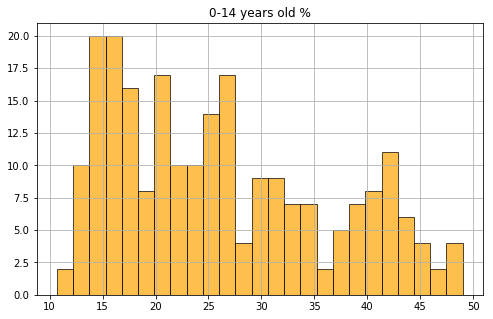

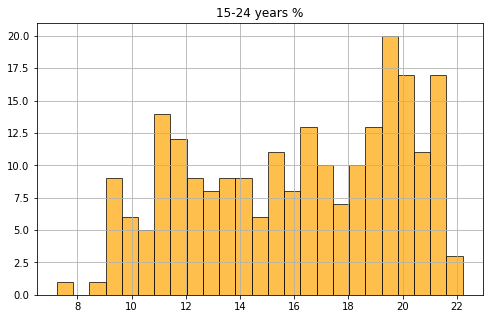

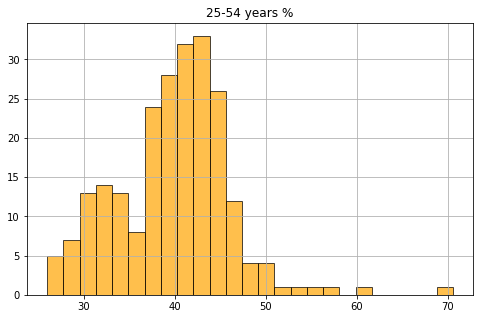

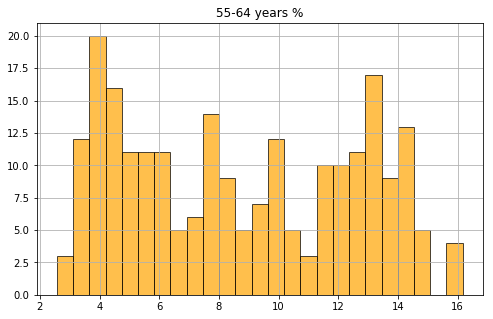

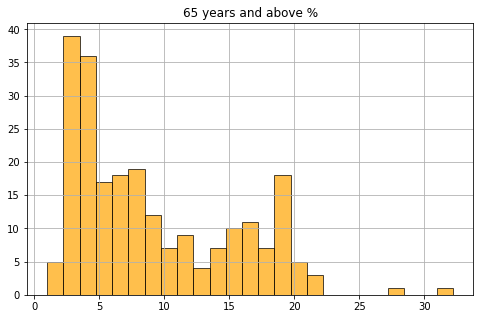

In [10]:
for i in range(5):
    df_demo.hist(df_demo.columns[i],bins=25,figsize=(8,5),color='orange',edgecolor='k',alpha=0.7)
    plt.show()

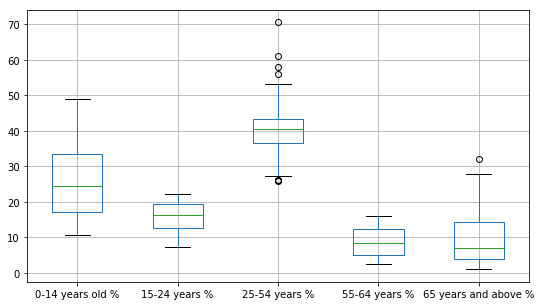

In [11]:
df_demo.boxplot(figsize=(9,5))
plt.show()

### Download all text data and save in a pickle file for easy later access

In [12]:
# Base URL
urlbase = 'https://www.cia.gov/library/publications/the-world-factbook/geos/'
# Empty data dictionary
text_data=dict()

# Iterate over every country
for i in range(1,len(country_names)-1):
    country_html=country_codes[i]+'.html'
    url_to_get=urlbase+country_html
    # Read the HTML from the URL and pass on to BeautifulSoup
    html = urllib.request.urlopen(url_to_get, context=ctx).read()
    soup = BeautifulSoup(html, 'html.parser')
    txt=soup.get_text()
    text_data[country_names[i]]=txt
    print(f"Finished loading data for {country_names[i]}")
    
print ("\n**Finished downloading all text data!**")

Finished loading data for  Afghanistan 
Finished loading data for  Akrotiri 
Finished loading data for  Albania 
Finished loading data for  Algeria 
Finished loading data for  American Samoa 
Finished loading data for  Andorra 
Finished loading data for  Angola 
Finished loading data for  Anguilla 
Finished loading data for  Antarctica 
Finished loading data for  Antigua and Barbuda 
Finished loading data for  Arctic Ocean 
Finished loading data for  Argentina 
Finished loading data for  Armenia 
Finished loading data for  Aruba 
Finished loading data for  Ashmore and Cartier Islands 
Finished loading data for  Atlantic Ocean 
Finished loading data for  Australia 
Finished loading data for  Austria 
Finished loading data for  Azerbaijan 
Finished loading data for  Bahamas, The 
Finished loading data for  Bahrain 
Finished loading data for  Baker Island 
Finished loading data for  Bangladesh 
Finished loading data for  Barbados 
Finished loading data for  Belarus 
Finished loading data 

Finished loading data for  Senegal 
Finished loading data for  Serbia 
Finished loading data for  Seychelles 
Finished loading data for  Sierra Leone 
Finished loading data for  Singapore 
Finished loading data for  Sint Maarten 
Finished loading data for  Slovakia 
Finished loading data for  Slovenia 
Finished loading data for  Solomon Islands 
Finished loading data for  Somalia 
Finished loading data for  South Africa 
Finished loading data for  Southern Ocean 
Finished loading data for  South Georgia and South Sandwich Islands 
Finished loading data for  South Sudan 
Finished loading data for  Spain 
Finished loading data for  Spratly Islands 
Finished loading data for  Sri Lanka 
Finished loading data for  Sudan 
Finished loading data for  Suriname 
Finished loading data for  Svalbard 
Finished loading data for  Swaziland 
Finished loading data for  Sweden 
Finished loading data for  Switzerland 
Finished loading data for  Syria 
Finished loading data for  Taiwan 
Finished loading 

In [13]:
import pickle
pickle.dump(text_data,open("text_data_CIA_Factobook.p", "wb"))

In [222]:
text_data = pickle.load(open("text_data_CIA_Factobook.p", "rb"))

In [223]:
avg = 0
total=0
for k,v in text_data.items():
    total+=len(v)
print("Total length",total)
avg=total/len(text_data)
print("Average length",avg)

Total length 12558614
Average length 47212.83458646617


In [224]:
text_data.keys()

dict_keys([' Afghanistan ', ' Akrotiri ', ' Albania ', ' Algeria ', ' American Samoa ', ' Andorra ', ' Angola ', ' Anguilla ', ' Antarctica ', ' Antigua and Barbuda ', ' Arctic Ocean ', ' Argentina ', ' Armenia ', ' Aruba ', ' Ashmore and Cartier Islands ', ' Atlantic Ocean ', ' Australia ', ' Austria ', ' Azerbaijan ', ' Bahamas, The ', ' Bahrain ', ' Baker Island ', ' Bangladesh ', ' Barbados ', ' Belarus ', ' Belgium ', ' Belize ', ' Benin ', ' Bermuda ', ' Bhutan ', ' Bolivia ', ' Bosnia and Herzegovina ', ' Botswana ', ' Bouvet Island ', ' Brazil ', ' British Indian Ocean Territory ', ' British Virgin Islands ', ' Brunei ', ' Bulgaria ', ' Burkina Faso ', ' Burma ', ' Burundi ', ' Cabo Verde ', ' Cambodia ', ' Cameroon ', ' Canada ', ' Cayman Islands ', ' Central African Republic ', ' Chad ', ' Chile ', ' China ', ' Christmas Island ', ' Clipperton Island ', ' Cocos (Keeling) Islands ', ' Colombia ', ' Comoros ', ' Congo, Democratic Republic of the ', ' Congo, Republic of the ', '

### Function to convert a string with a comma (e.g. a GDP value) to a float

In [225]:
def convert_float(string):
    if string.isnumeric():
        return float(string)
    if string[0].isdigit():
        if ',' not in string and '.' in string:
            return float(string)
        if ',' not in string and '.' not in string:
            idx=string.find(' ')
            result = string[:idx]
            return float(result)
        idx1=string.find(',')
        idx2=string.find(' ')
        result = string[:idx1]+string[idx1+1:idx2]
        return float(result)
    else:
        return (-1)

### Extract Total GDP (PPP) (in billion $)

In [226]:
# Initialize dictionary for holding the data
Total_GDP_PPP = {}
# Iterate over every country
for i in range(1,len(country_names)-1):
    country= country_names[i]
    txt=text_data[country]       
    pos = txt.find('GDP (purchasing power parity):')
    if pos!=-1: 
        pos= pos+len('GDP (purchasing power parity):')
        string = txt[pos+1:pos+15]
        start = re.search('\$',string)
        end = re.search('[b,t]',string)
        if (start!=None and end!=None):
            start=start.start()
            end=end.start()
            a=string[start+1:start+end-1]
            print(a)
            a = convert_float(a)
            if (string[end]=='t'):
                # If the GDP was in trillions, multiply it by 1000
                a=1000*a
            #print(f"Total GDP (PPP) of {country}: {a} billion")
            # Insert the data in the dictionary
            Total_GDP_PPP[country]=a
        else:
            print("**Could not find GDP data!**")
    else:
        print("**Could not find GDP data!**")

print ("\nFinished finding all GDP (Purchasing Power Parity) (in billion $) data")

69.51
**Could not find GDP data!**
35.87
629.3
**Could not find GDP data!**
3.327
192
**Could not find GDP data!**
**Could not find GDP data!**
2.39
**Could not find GDP data!**
911.5
27.21
2.516
**Could not find GDP data!**
**Could not find GDP data!**
1.235
434.1
166.8
9.339
69.77
**Could not find GDP data!**
686.5
4.919
175.9
526.4
3.23
25.29
5.198
7.011
83.5
43.85
39.55
**Could not find GDP data!**
3.219
**Could not find GDP data!**
**Could not find GDP data!**
32.91
152.4
35.68
330.9
7.985
3.734
64.21
81.55
1.764
2.507
3.395
29.64
452.1
23.12
NA
Agricu
**Could not find GDP data!**
**Could not find GDP data!**
712.5
1.323
67.99
29.16
**Could not find GDP data!**
**Could not find GDP data!**
85.2
96.27
100.2
132.9
3.128
31.19
372.6
285.5
**Could not find GDP data!**
3.64
**Could not find GDP data!**
172.6
188.5
1.199
56.9
29.38
9.631
41.2
195.8
**Could not find GDP data!**
2.001
8.647
242.4
2.826
5.49
**Could not find GDP data!**
36.75
3.582
**Could not find GDP data!**
39.32
4.15
1

### Extract GDP/capita (PPP) for every country wherever possible

In [227]:
# Initialize dictionary for holding the data
GDP_PPP = {}
# Iterate over every country
for i in range(1,len(country_names)-1):
    country= country_names[i]
    txt=text_data[country]       
    pos = txt.find('GDP - per capita (PPP):')
    if pos!=-1:
        pos= pos+len('GDP - per capita (PPP):')
        string = txt[pos+1:pos+11]
        start = re.search('\$',string)
        end = re.search('\S',string)
        if (start!=None and end!=None):
            start=start.start()
            end=end.start()
            a=string[start+1:start+end-1]
            #print(a)
            a = convert_float(a)
            if (a!=-1.0):
                print(f"GDP/capita (PPP) of {country}: {a} dollars")
                # Insert the data in the dictionary
                GDP_PPP[country]=a
            else:
                print("**Could not find GDP/capita data!**")
        else:
            print("**Could not find GDP/capita data!**")
    else:
        print("**Could not find GDP/capita data!**")

print ("\nFinished finding all GDP/capita data")

GDP/capita (PPP) of  Afghanistan : 1900.0 dollars
**Could not find GDP/capita data!**
GDP/capita (PPP) of  Albania : 12500.0 dollars
GDP/capita (PPP) of  Algeria : 15100.0 dollars
GDP/capita (PPP) of  American Samoa : 13000.0 dollars
GDP/capita (PPP) of  Andorra : 49900.0 dollars
GDP/capita (PPP) of  Angola : 6800.0 dollars
GDP/capita (PPP) of  Anguilla : 12200.0 dollars
**Could not find GDP/capita data!**
GDP/capita (PPP) of  Antigua and Barbuda : 26300.0 dollars
**Could not find GDP/capita data!**
GDP/capita (PPP) of  Argentina : 20700.0 dollars
GDP/capita (PPP) of  Armenia : 9100.0 dollars
GDP/capita (PPP) of  Aruba : 25300.0 dollars
**Could not find GDP/capita data!**
**Could not find GDP/capita data!**
GDP/capita (PPP) of  Australia : 49900.0 dollars
GDP/capita (PPP) of  Austria : 49200.0 dollars
GDP/capita (PPP) of  Azerbaijan : 17400.0 dollars
GDP/capita (PPP) of  Bahamas, The : 25100.0 dollars
GDP/capita (PPP) of  Bahrain : 51800.0 dollars
**Could not find GDP/capita data!**
GD

In [228]:
df_GDP=pd.Series(GDP_PPP).to_frame()

In [229]:
df_GDP.columns=['GDP (PPP)']
df_GDP.index.name='COUNTRY'

In [230]:
df_GDP

,GDP (PPP)
COUNTRY,
Afghanistan,1900.0
Albania,12500.0
Algeria,15100.0
American Samoa,13000.0
Andorra,49900.0
Angola,6800.0
Anguilla,12200.0
Antigua and Barbuda,26300.0
Argentina,20700.0


In [231]:
df_Total_GDP=pd.Series(Total_GDP_PPP).to_frame()

In [232]:
df_Total_GDP.columns=['Total GDP (PPP)']
df_Total_GDP.index.name='COUNTRY'

In [233]:
df_combined = df_demo.join(df_GDP)
df_combined.dropna(inplace=True)

In [234]:
df_combined = df_combined.join(df_Total_GDP)
df_combined.dropna(inplace=True)

In [235]:
df_combined

,0-14 years old %,15-24 years %,25-54 years %,55-64 years %,65 years and above %,GDP (PPP),Total GDP (PPP)
COUNTRY,,,,,,,
Afghanistan,40.92,22.22,30.35,3.92,2.59,1900.0,69.510
Albania,18.05,17.47,41.06,11.54,11.89,12500.0,35.870
Algeria,29.31,15.30,42.93,6.81,5.65,15100.0,629.300
Andorra,14.40,9.64,46.18,14.16,15.61,49900.0,3.327
Angola,48.12,18.25,28.03,3.26,2.34,6800.0,192.000
Antigua and Barbuda,23.09,16.83,42.19,9.83,8.06,26300.0,2.390
Argentina,24.59,15.28,39.38,9.13,11.62,20700.0,911.500
Armenia,18.94,12.89,43.43,13.41,11.33,9100.0,27.210
Aruba,17.64,12.78,41.72,14.28,13.59,25300.0,2.516


### GDP growth rate

In [236]:
# Initialize dictionary for holding the data
GDP_growth = {}
# Iterate over every country
for i in range(1,len(country_names)-1):
    country= country_names[i]
    txt=text_data[country]       
    pos = txt.find('GDP - real growth rate:')
    if pos!=-1: 
        pos= pos+len('GDP - real growth rate: ')
        string = txt[pos:pos+12]
        end = re.search('%',string)
        if (end!=None):
            end=end.start()
            a=string[:end]
            if a[-1].isdigit():
                a = float(a)
                print(f"GDP growth rate of {country}: {a}")
                # Insert the data in the dictionary
                GDP_growth[country]=a
            else:
                print("**Could not find GDP growth rate data!**")
        else:
            print("**Could not find GDP growth rate data!**")
    else:
        print("**Could not find GDP growth rate data!**")

print ("\nFinished finding all GDP growth rate data")

GDP growth rate of  Afghanistan : 2.5
**Could not find GDP growth rate data!**
GDP growth rate of  Albania : 3.7
GDP growth rate of  Algeria : 1.5
GDP growth rate of  American Samoa : -2.4
GDP growth rate of  Andorra : -1.1
GDP growth rate of  Angola : 1.5
GDP growth rate of  Anguilla : -8.5
**Could not find GDP growth rate data!**
GDP growth rate of  Antigua and Barbuda : 2.7
**Could not find GDP growth rate data!**
GDP growth rate of  Argentina : 2.5
GDP growth rate of  Armenia : 3.5
GDP growth rate of  Aruba : 2.4
**Could not find GDP growth rate data!**
**Could not find GDP growth rate data!**
GDP growth rate of  Australia : 2.2
GDP growth rate of  Austria : 2.3
GDP growth rate of  Azerbaijan : -1.0
GDP growth rate of  Bahamas, The : 1.8
GDP growth rate of  Bahrain : 2.5
**Could not find GDP growth rate data!**
GDP growth rate of  Bangladesh : 7.1
GDP growth rate of  Barbados : 0.9
GDP growth rate of  Belarus : 0.7
GDP growth rate of  Belgium : 1.6
GDP growth rate of  Belize : 2.5


In [237]:
df_GDP_growth=pd.Series(GDP_growth).to_frame()
df_GDP_growth.columns=['GDP growth rate (%)']
df_GDP_growth.index.name='COUNTRY'
df_GDP_growth

,GDP growth rate (%)
COUNTRY,
Afghanistan,2.5
Albania,3.7
Algeria,1.5
American Samoa,-2.4
Andorra,-1.1
Angola,1.5
Anguilla,-8.5
Antigua and Barbuda,2.7
Argentina,2.5


In [238]:
df_combined = df_combined.join(df_GDP_growth)
df_combined.dropna(inplace=True)
df_combined

,0-14 years old %,15-24 years %,25-54 years %,55-64 years %,65 years and above %,GDP (PPP),Total GDP (PPP),GDP growth rate (%)
COUNTRY,,,,,,,,
Afghanistan,40.92,22.22,30.35,3.92,2.59,1900.0,69.510,2.5
Albania,18.05,17.47,41.06,11.54,11.89,12500.0,35.870,3.7
Algeria,29.31,15.30,42.93,6.81,5.65,15100.0,629.300,1.5
Andorra,14.40,9.64,46.18,14.16,15.61,49900.0,3.327,-1.1
Angola,48.12,18.25,28.03,3.26,2.34,6800.0,192.000,1.5
Antigua and Barbuda,23.09,16.83,42.19,9.83,8.06,26300.0,2.390,2.7
Argentina,24.59,15.28,39.38,9.13,11.62,20700.0,911.500,2.5
Armenia,18.94,12.89,43.43,13.41,11.33,9100.0,27.210,3.5
Aruba,17.64,12.78,41.72,14.28,13.59,25300.0,2.516,2.4


### Internet users %

In [239]:
# Initialize dictionary for holding the data
Internet_user = {}
# Iterate over every country
for i in range(1,len(country_names)-1):
    country= country_names[i]
    txt=text_data[country]       
    pos = txt.find('Internet users:')
    if pos!=-1: 
        pos= pos+len('Internet users: ')
        string = txt[pos:pos+50]
        #print(string)
        start=re.search('percent of population: ',string)
        end = re.search('%',string)
        if (start!=None and end!=None):
            start=start.end()
            end=end.start()
            a=string[start:end]
            if a[-1].isdigit():
                a = float(a)
                print(f"Internet users % of {country}: {a}")
                # Insert the data in the dictionary
                Internet_user[country]=a
            else:
                print("**Could not find Internet users data!**")
        else:
            print("**Could not find Internet users data!**")
    else:
        print("**Could not find Internet users data!**")

print ("\nFinished finding all Internet users data")

Internet users % of  Afghanistan : 10.6
**Could not find Internet users data!**
Internet users % of  Albania : 66.4
Internet users % of  Algeria : 42.9
Internet users % of  American Samoa : 31.3
Internet users % of  Andorra : 97.9
Internet users % of  Angola : 13.0
Internet users % of  Anguilla : 81.6
Internet users % of  Antarctica : 100.0
Internet users % of  Antigua and Barbuda : 65.2
**Could not find Internet users data!**
Internet users % of  Argentina : 70.2
Internet users % of  Armenia : 62.0
Internet users % of  Aruba : 93.5
**Could not find Internet users data!**
**Could not find Internet users data!**
Internet users % of  Australia : 88.2
Internet users % of  Austria : 84.3
Internet users % of  Azerbaijan : 78.2
Internet users % of  Bahamas, The : 80.0
Internet users % of  Bahrain : 98.0
**Could not find Internet users data!**
Internet users % of  Bangladesh : 18.2
Internet users % of  Barbados : 79.5
Internet users % of  Belarus : 71.1
Internet users % of  Belgium : 86.5
Int

In [240]:
df_Internet_user=pd.Series(Internet_user).to_frame()
df_Internet_user.columns=['Internet users (%)']
df_Internet_user.index.name='COUNTRY'
df_Internet_user

,Internet users (%)
COUNTRY,
Afghanistan,10.6
Albania,66.4
Algeria,42.9
American Samoa,31.3
Andorra,97.9
Angola,13.0
Anguilla,81.6
Antarctica,100.0
Antigua and Barbuda,65.2


In [241]:
df_combined = df_combined.join(df_Internet_user)
df_combined.dropna(inplace=True)
df_combined

,0-14 years old %,15-24 years %,25-54 years %,55-64 years %,65 years and above %,GDP (PPP),Total GDP (PPP),GDP growth rate (%),Internet users (%)
COUNTRY,,,,,,,,,
Afghanistan,40.92,22.22,30.35,3.92,2.59,1900.0,69.510,2.5,10.6
Albania,18.05,17.47,41.06,11.54,11.89,12500.0,35.870,3.7,66.4
Algeria,29.31,15.30,42.93,6.81,5.65,15100.0,629.300,1.5,42.9
Andorra,14.40,9.64,46.18,14.16,15.61,49900.0,3.327,-1.1,97.9
Angola,48.12,18.25,28.03,3.26,2.34,6800.0,192.000,1.5,13.0
Antigua and Barbuda,23.09,16.83,42.19,9.83,8.06,26300.0,2.390,2.7,65.2
Argentina,24.59,15.28,39.38,9.13,11.62,20700.0,911.500,2.5,70.2
Armenia,18.94,12.89,43.43,13.41,11.33,9100.0,27.210,3.5,62.0
Aruba,17.64,12.78,41.72,14.28,13.59,25300.0,2.516,2.4,93.5


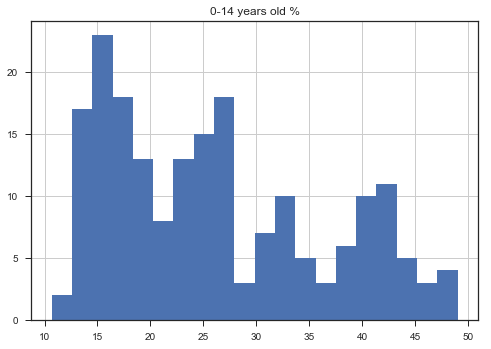

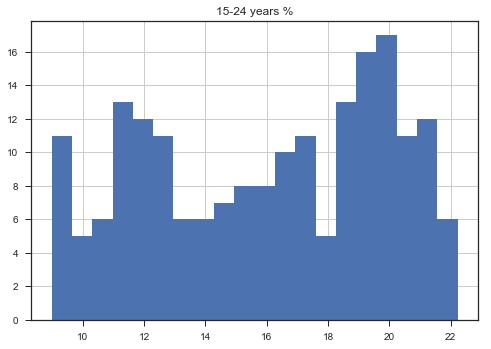

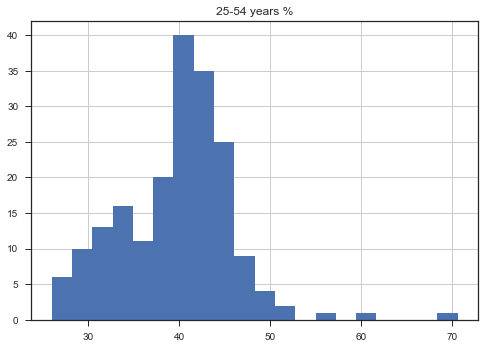

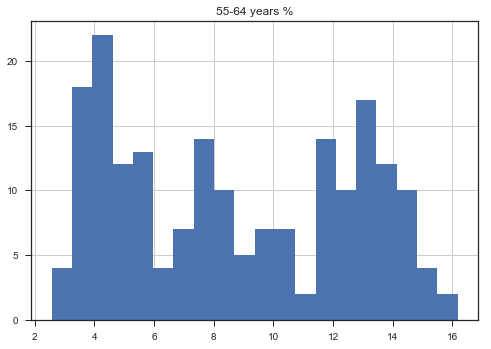

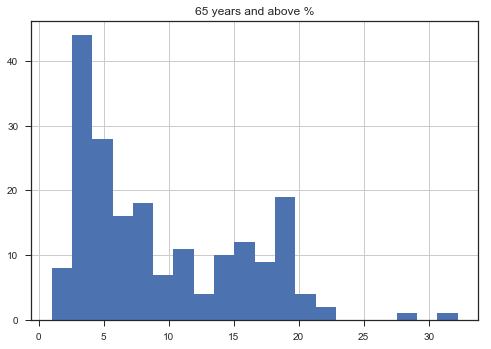

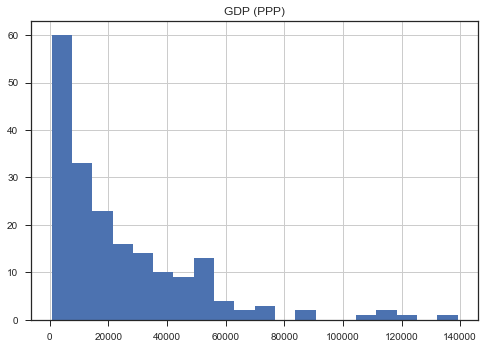

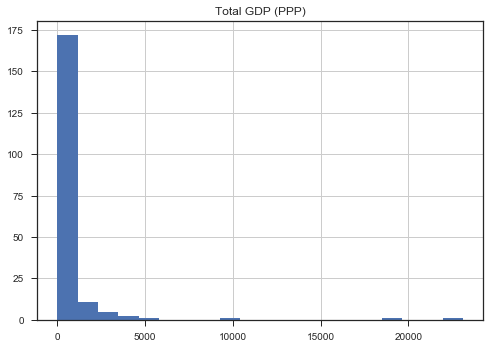

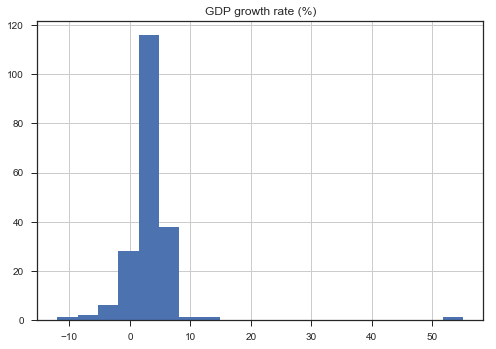

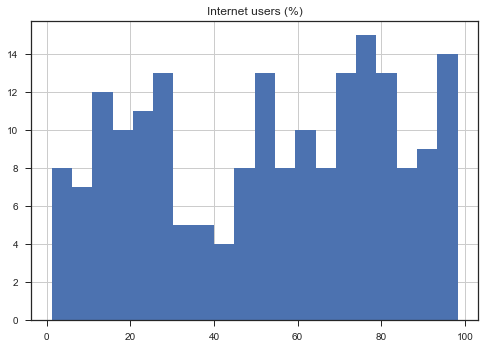

In [242]:
for c in df_combined.columns:
    df_combined.hist(c,bins=20)
    plt.show()

In [243]:
df_combined[df_combined['Internet users (%)']<20][df_combined['GDP (PPP)']>5000]

c:\users\tirtha\python\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,0-14 years old %,15-24 years %,25-54 years %,55-64 years %,65 years and above %,GDP (PPP),Total GDP (PPP),GDP growth rate (%),Internet users (%)
COUNTRY,,,,,,,,,
Angola,48.12,18.25,28.03,3.26,2.34,6800.0,192.00,1.5,13.0
"Congo, Republic of the",41.67,17.10,33.89,4.29,3.06,6700.0,29.16,-3.6,7.6
Laos,32.76,21.17,36.70,5.48,3.89,7400.0,49.21,6.9,18.2
Pakistan,31.36,21.14,37.45,5.57,4.48,5400.0,1056.00,5.3,15.5
Turkmenistan,25.79,18.39,43.18,7.90,4.74,18700.0,103.50,6.5,18.0


In [244]:
import seaborn as sns
from scipy.stats import linregress

### Internet users % vs. GDP/capita for middle-income (GDP) countries

c:\users\tirtha\python\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


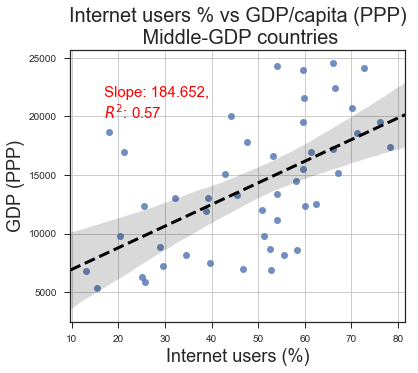

In [254]:
sns.set_style('ticks')
# Create a filtered data frame and x and y arrays
filter_gdp = df_combined['Total GDP (PPP)'] > 50
filter_low_income=df_combined['GDP (PPP)']>5000
filter_high_income=df_combined['GDP (PPP)']<25000

df_filtered = df_combined[filter_gdp][filter_low_income][filter_high_income]
x_array = df_filtered['Internet users (%)']
y_array = df_filtered['GDP (PPP)']
    
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Internet users (%)",fontsize=18)
ax.set_ylabel("GDP/capita (PPP) in US dollars",fontsize=18)
ax.set_title("Internet users % vs GDP/capita (PPP)\n Middle-GDP countries",fontsize=20)
fig.set_size_inches(6, 5)
g=sns.regplot(data=df_filtered,x=x_array,y=y_array,ax=ax,
                  line_kws={'ls':'--','linewidth':3,'color':'k'},
                 scatter_kws={'edgecolor':'k'})
# Linear regression calculations
slope,intercept,rvalue,pvalue,stderr = linregress(x_array,y_array)
# Get the bottom, top, left, and right limits
bottom,top = ax.get_ylim()
left,right = ax.get_xlim()
    
ax.text(s=f"Slope: {round(slope,3)},\n$R^2$: {round(rvalue,3)}",
            x=left+(right-left)*0.1,y=top-(top-bottom)*0.25,fontsize=15,color='red')
plt.show()

### Internet users % vs. GDP/capita for low-income (GDP) countries

c:\users\tirtha\python\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


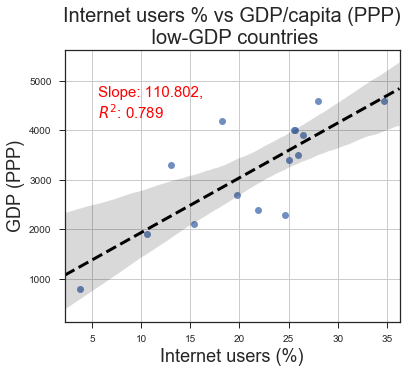

In [253]:
# Create a filtered data frame and x and y arrays
filter_gdp = df_combined['Total GDP (PPP)'] > 50
filter_low_income=df_combined['GDP (PPP)']<5000

df_filtered = df_combined[filter_gdp][filter_low_income]
x_array = df_filtered['Internet users (%)']
y_array = df_filtered['GDP (PPP)']
    
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Internet users (%)",fontsize=18)
ax.set_ylabel("GDP/capita (PPP), in US $",fontsize=18)
ax.set_title("Internet users % vs GDP/capita (PPP)\n low-GDP countries",fontsize=20)
fig.set_size_inches(6, 5)
g=sns.regplot(data=df_filtered,x=x_array,y=y_array,ax=ax,
                  line_kws={'ls':'--','linewidth':3,'color':'k'},
                 scatter_kws={'edgecolor':'k'})
# Linear regression calculations
slope,intercept,rvalue,pvalue,stderr = linregress(x_array,y_array)
# Get the bottom, top, left, and right limits
bottom,top = ax.get_ylim()
left,right = ax.get_xlim()
    
ax.text(s=f"Slope: {round(slope,3)},\n$R^2$: {round(rvalue,3)}",
            x=left+(right-left)*0.1,y=top-(top-bottom)*0.25,fontsize=15,color='red')
plt.show()

c:\users\tirtha\python\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


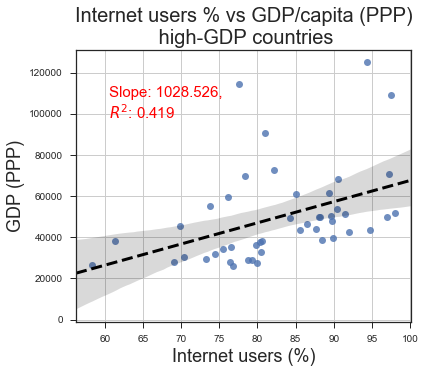

In [255]:
# Create a filtered data frame and x and y arrays
filter_gdp = df_combined['Total GDP (PPP)'] > 50
filter_high_income=df_combined['GDP (PPP)']>25000

df_filtered = df_combined[filter_gdp][filter_high_income]
x_array = df_filtered['Internet users (%)']
y_array = df_filtered['GDP (PPP)']
    
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Internet users (%)",fontsize=18)
ax.set_ylabel("GDP/capita (PPP)",fontsize=18)
ax.set_title("Internet users % vs GDP/capita (PPP)\n high-GDP countries",fontsize=20)
fig.set_size_inches(6, 5)
g=sns.regplot(data=df_filtered,x=x_array,y=y_array,ax=ax,
                  line_kws={'ls':'--','linewidth':3,'color':'k'},
                 scatter_kws={'edgecolor':'k'})
# Linear regression calculations
slope,intercept,rvalue,pvalue,stderr = linregress(x_array,y_array)
# Get the bottom, top, left, and right limits
bottom,top = ax.get_ylim()
left,right = ax.get_xlim()
    
ax.text(s=f"Slope: {round(slope,3)},\n$R^2$: {round(rvalue,3)}",
            x=left+(right-left)*0.1,y=top-(top-bottom)*0.25,fontsize=15,color='red')
plt.show()

In [248]:
df_combined.loc[' India ']

0-14 years old %          27.34
15-24 years %             17.90
25-54 years %             41.08
55-64 years %              7.45
65 years and above %       6.24
GDP (PPP)               7200.00
Total GDP (PPP)         9447.00
GDP growth rate (%)        6.70
Internet users (%)        29.50
Name:  India , dtype: float64

In [249]:
df_combined.columns

Index(['0-14 years old %', '15-24 years %', '25-54 years %', '55-64 years %',
       '65 years and above %', 'GDP (PPP)', 'Total GDP (PPP)',
       'GDP growth rate (%)', 'Internet users (%)'],
      dtype='object')

c:\users\tirtha\python\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


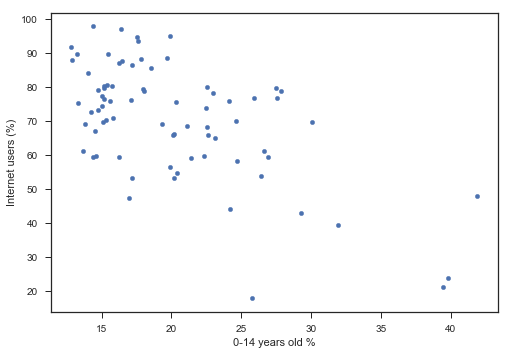

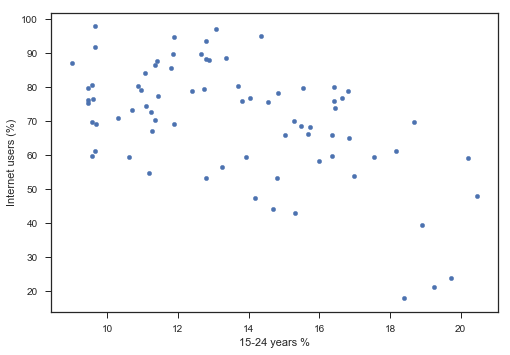

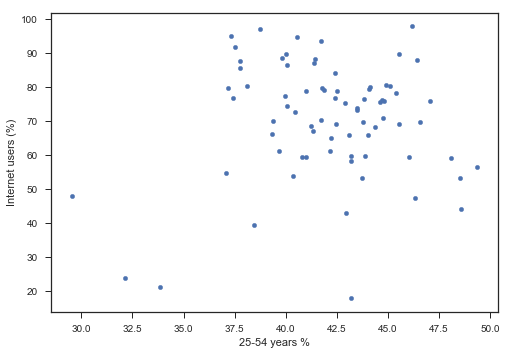

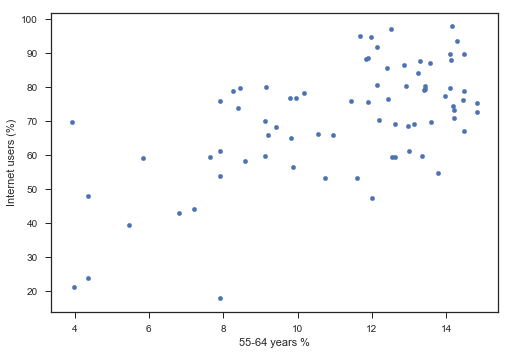

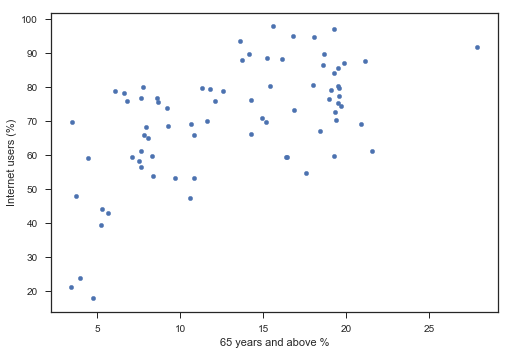

In [250]:
filter1=df_combined['GDP (PPP)']>15000
filter2=df_combined['GDP (PPP)']<50000
df_filtered = df_combined[filter1][filter2]

for c in df_filtered.columns[0:5]:
    df_filtered.plot.scatter(x=c, y='Internet users (%)')